In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
from heapq import *
f = open('input.in')
input = f.readline

In [19]:
FG = nx.DiGraph()

In [20]:
V, E = map(int, input().split())
K = int(input())
print("V:{}\nE:{}\nK:{}".format(V,E,K))

G = [dict() for _ in range(V+1)]
for _ in range(E):
    u,v,w = map(int, input().split())
    FG.add_weighted_edges_from([(u,v,w)])
    if v in G[u]:
        G[u][v] = min(G[u][v], w)
    else:
        G[u][v] = w
    
print("G:{}".format(G))

V:5
E:6
K:1
G:[{}, {2: 2, 3: 3}, {3: 4, 4: 5}, {4: 6}, {}, {1: 1}]


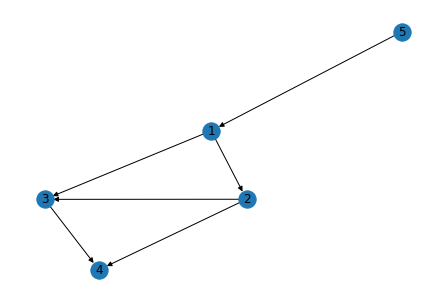

In [24]:
nx.draw(FG, with_labels=True)
plt.show()

### Dijkstra algorithm 1

In [27]:
# distance from K
inf = sys.maxsize
dist = [inf for _ in range(V+1)]
dist[K] = 0

# priority queue
pq = [(0,K)]
while pq:
    d1, v1 = heappop(pq)
    for v2, w2 in G[v1].items():
        if dist[v1]+w2 < dist[v2]:
            dist[v2] = dist[v1]+w2
            heappush(pq, (dist[v2],v2))

for i in dist[1:]:
    print(i if i < inf else 'INF')

0
2
3
7
INF


### Dijkstra algorithm 2

In [8]:
# distance from K
dist = [-1 for _ in range(V+1)]

# priority queue
pq = [(0,K)]
while pq:
    d1, v1 = heappop(pq)
    if dist[v1] != -1:
        continue
    dist[v1] = d1
    for v2, d2 in G[v1].items():
        heappush(pq, (dist[v1]+d2,v2))

for i in dist[1:]:
    print('INF' if i == -1 else i)

0
2
3
7
INF
